## 步骤一 处理成单品类的时间维度数据
### 数据整合：整合附件1-附件4的数据


In [2]:
import pandas as pd
from IPython.display import display

# 读取Excel文件中的表格
data1 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件1.xlsx", sheet_name=0)
data2 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件2.xlsx", sheet_name=0)
data3 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件3.xlsx", sheet_name=0)
data4 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件4.xlsx", sheet_name=0)
data3 = data3.rename(columns={'日期': '销售日期'})
data4 = data4.rename(columns={'小分类编码': '分类编码'})

# 合并 data1 和 data2，基于 '单品编码'
merged_df_1_2 = pd.merge(data2, data1, on='单品编码')

# 确保 '分类编码' 的类型一致
data4['分类编码'] = data4['分类编码'].astype(str)  # 或者将另一列转换为整数类型 data4['分类编码'].astype(int)
merged_df_1_2['分类编码'] = merged_df_1_2['分类编码'].astype(str)  # 也可以选择转换为整数类型

# 重新进行合并操作
merged_df_1_2_4 = pd.merge(merged_df_1_2, data4, on='分类编码')


# 合并 merged_df_1_2_4 和 data3，基于 '单品编码' 和 '销售日期'
merged_final = pd.merge(merged_df_1_2_4, data3, on=['单品编码', '销售日期'], how='inner')

# 计算每个分类的销售总量
merged_final['销售价'] = merged_final['销售单价(元/千克)'] * merged_final['销量(千克)']




In [3]:
display(merged_final)

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,单品名称,分类编码,分类名称,小分类名称,平均损耗率(%),批发价格(元/千克),销售价
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,辣椒类,9.24,4.32,3.0096
1,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,辣椒类,9.24,4.32,3.1084
2,2020-07-01,09:21:55.556,102900005117056,0.277,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,辣椒类,9.24,4.32,2.1052
3,2020-07-01,09:22:01.274,102900005117056,0.132,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,辣椒类,9.24,4.32,1.0032
4,2020-07-01,09:41:09.342,102900005117056,0.198,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类,辣椒类,9.24,4.32,1.5048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878498,2022-09-06,19:47:17.707,102900011033999,0.368,5.2,销售,否,圆茄子(1),1011010501,茄类,茄类,6.68,6.19,1.9136
878499,2022-09-06,19:57:30.011,102900011033999,0.465,5.2,销售,否,圆茄子(1),1011010501,茄类,茄类,6.68,6.19,2.4180
878500,2022-09-06,20:41:39.092,102900011033999,0.446,5.2,销售,否,圆茄子(1),1011010501,茄类,茄类,6.68,6.19,2.3192
878501,2022-09-07,10:17:50.383,102900011033999,0.368,5.2,销售,否,圆茄子(1),1011010501,茄类,茄类,6.68,6.20,1.9136


按分类名称和单品名称分组，查看所有信息

In [4]:
# #####查看所有分类名称，单品名称中的信息###########
# grouped = merged_final.groupby(['分类名称',"单品名称"])
# for (category,item), group in grouped:
#     print(category,item,group)

# 读取某列中的非重复项目
categories = merged_final['分类名称'].unique()[1:6]
for category in categories:
    filtered = merged_final[merged_final['分类名称'] == category]
    overview = filtered[['销量(千克)','销售单价(元/千克)']].describe()
    print(f"分类名称: {category} 的数据概览")
    print(overview)


分类名称: 花叶类 的数据概览
              销量(千克)     销售单价(元/千克)
count  331968.000000  331968.000000
mean        0.598012       6.317257
std         0.464645       3.940480
min        -9.082000       0.100000
25%         0.341000       3.900000
50%         0.489000       6.000000
75%         0.892000       8.000000
max       160.000000     119.900000
分类名称: 水生根茎类 的数据概览
             销量(千克)    销售单价(元/千克)
count  58647.000000  58647.000000
mean       0.691960      9.689851
std        0.551319      5.529872
min       -2.000000      1.000000
25%        0.372000      6.000000
50%        0.556000      8.000000
75%        0.972000     10.800000
max       17.000000     53.800000
分类名称: 食用菌 的数据概览
              销量(千克)     销售单价(元/千克)
count  148424.000000  148424.000000
mean        0.512631      12.036941
std         0.369392       7.202455
min        -2.000000       0.500000
25%         0.216000       5.500000
50%         0.352000      12.000000
75%         1.000000      18.000000
max        25.000000     116.000

In [11]:
# 查看销售日期范围
date = merged_final
date["销售日期"] = pd.to_datetime(date["销售日期"])
min_date = date["销售日期"].min()
max_date = date["销售日期"].max()
print(f"销售日期的最小值为: {min_date}")
print(f"销售日期的最大值为: {max_date}")

销售日期的最小值为: 2020-07-01 00:00:00
销售日期的最大值为: 2023-06-30 00:00:00


In [12]:
# import pandas as pd

# # 设置区间和分类名称
# start_date = "2020-07-01"  # 区间开始日期
# end_date = "2023-06-30"  # 区间结束日期

# # 获取所有分类的唯一值
# unique_categories = merged_final["分类名称"].unique()

# # 生成完整日期范围
# full_date_range = pd.date_range(start=start_date, end=end_date)

# for specific_category in unique_categories:
#     # 筛选特定分类的数据
#     filtered_data = merged_final[
#         merged_final["分类名称"] == specific_category
#     ]

#     # 确保销售日期是datetime格式
#     filtered_data["销售日期"] = pd.to_datetime(filtered_data["销售日期"])

#     # 筛选出目标区间内的销售日期
#     date_in_range = filtered_data[
#         (filtered_data["销售日期"] >= start_date) & (filtered_data["销售日期"] <= end_date)
#     ]["销售日期"].unique()

#     # 找出缺失的日期
#     missing_dates = set(full_date_range) - set(date_in_range)

#     # 输出结果
#     if missing_dates:
#         print(f"分类名称 '{specific_category}' 在日期区间 {start_date} 到 {end_date} 内缺失以下销售日期：")
#         missing_dates_sorted = sorted(list(missing_dates))
#         for date in missing_dates_sorted:
#             print(date.strftime("%Y-%m-%d"))
#     else:
#         print(f"分类名称 '{specific_category}' 在日期区间 {start_date} 到 {end_date} 内无缺失销售日期。")


In [13]:
# 删除销售单价中销售单价超过四分位距的销售单价数据

#建立一个关于特定标准删除异常值的函数
def remove_outliers(group):
    Q1 = group['销售单价(元/千克)'].quantile(0.25)
    Q3 = group['销售单价(元/千克)'].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return group[(group['销售单价(元/千克)'] >=lower_bound) & (group['销售单价(元/千克)']<=upper_bound)]
# 根据分类名称分组，分别进行异常值删除的操作,保存到filtered_data中
filtered_data = merged_final.groupby('分类名称', group_keys=False).apply(remove_outliers)
#filter_data赋值给merged_final
merged_data = filtered_data
#打印数据量
original_count = merged_final.shape[0]
filtered_count = filtered_data.shape[0]
print(f'删除了{original_count-filtered_count}行')
print(f'剩余{filtered_count}行')



删除了22802行
剩余855701行


In [14]:
# 删除销售量中销售量超过四分位距的销售单价数据
#建立一个关于特定标准删除异常值的函数
def remove_outliers(group):
    Q1 = group['销量(千克)'].quantile(0.25)
    Q3 = group['销量(千克)'].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return group[(group['销量(千克)'] >=lower_bound) & (group['销量(千克)']<=upper_bound)]
# 根据分类名称分组，分别进行异常值删除的操作,保存到filtered_data中
filtered_data = merged_data.groupby('分类名称', group_keys=False).apply(remove_outliers)
#filter_data赋值给merged_final
merged_data = filtered_data
#打印数据量
original_count = merged_final.shape[0]
filtered_count = filtered_data.shape[0]
merged_count = merged_data.shape[0]
print(f'删除了{original_count-filtered_count}行')
print(f'剩余{filtered_count}行')
print(f'merged_data剩余{merged_count}')

删除了33718行
剩余844785行
merged_data剩余844785


定价和销量计算逻辑

In [15]:
# 枚举单品名称
categories = merged_data['分类名称'].unique()
category_items = {}
for category in categories:
    items = merged_data[merged_data['分类名称'] == category]['单品名称'].unique()
    category_items[category] = items  # 修正为按类别存储单品名称

# 3. 计算每一个'分类名称'下各个'单品名称'的平均定价
# 创建一个字典以存储平均定价数据
average_pricing = {}
for category in categories:
    # 筛选出当前分类的数据
    category_data = merged_data[merged_data['分类名称'] == category]
    # 按单品名称分组并计算定价的平均值
    avg_price_data = category_data.groupby('单品名称')['销售单价(元/千克)'].mean()
    average_pricing[category] = avg_price_data.to_dict()

    # 检查是否正确计算了平均定价
    print(f"检查分类: {category}")
    print(avg_price_data)

# 输出平均定价结果
for category, pricing in average_pricing.items():
    print(f"分类名称: {category}")
    for item, avg_price in pricing.items():
        print(f"  单品名称: {item}, 平均定价: {avg_price}")




# 创建一个字典以存储每天每个分类的销量
category_daily_sales = {}
for category in categories:
    # 筛选出当前分类的数据
    category_data = merged_data[merged_data['分类名称'] == category]
    # 按日期分组计算每天的销量之和
    daily_sales = category_data.groupby('销售日期')['销量(千克)'].sum().to_dict()
    category_daily_sales[category] = daily_sales




检查分类: 水生根茎类
单品名称
净藕(1)        7.888451
净藕(2)        5.946067
净藕(3)        7.313133
洪湖莲藕(粉藕)    10.623391
洪湖莲藕(脆藕)     9.880000
洪湖藕带        12.658182
红莲藕带        10.698017
荸荠           6.321582
荸荠(份)        5.900000
莲蓬(个)        3.250820
菱角          12.890688
藕尖           4.000000
野生粉藕        14.058824
野藕(1)       10.175618
野藕(2)       13.000000
高瓜(1)       11.720129
高瓜(2)       16.023310
Name: 销售单价(元/千克), dtype: float64
检查分类: 花叶类
单品名称
上海青        7.497890
上海青(份)     2.960280
东门口小白菜     5.253676
丝瓜尖       11.800000
云南油麦菜      6.892300
            ...    
黄心菜(2)     7.089138
黄白菜(1)     7.222791
黄白菜(2)     6.751883
黑油菜        4.306667
龙牙菜        8.462595
Name: 销售单价(元/千克), Length: 90, dtype: float64
检查分类: 花菜类
单品名称
枝江青梗散花     8.065545
紫白菜(1)    12.777778
紫白菜(2)    15.000000
西兰花        9.878168
青梗散花       7.093610
Name: 销售单价(元/千克), dtype: float64
检查分类: 茄类
单品名称
圆茄子(1)     5.200000
圆茄子(2)     7.573191
大龙茄子       8.859337
紫圆茄       12.285714
紫茄子(1)    10.913223
紫茄子(2)     8.573288
花茄子       11.3

定价算法循环

In [16]:
# # 新的操作：定价算法循环
# # 1. 枚举所有的'分类名称'
# categories = merged_data['分类名称'].unique()

# # 2. 枚举每一个'分类名称'下所有的单品
# # 使用字典存储定价指数
# pricing_index = {}
# for category in categories:
#     # 筛选出当前分类的数据
#     category_data = merged_data[merged_data['分类名称'] == category]
#     category_average_prices = average_pricing[category]  # 获取分类的平均定价

#     # 3. 在每一天t中，计算定价指数
#     daily_pricing_index = {}
#     for date, group in category_data.groupby('销售日期'):
#         total_index = 0
#         unique_item_count = group['单品名称'].nunique()  # 计算唯一单品数量
#         detailed_steps = []  # 记录计算步骤
#         seen_items = set()  # 记录已计算的单品
#         for item, row in group.iterrows():
#             item_name = row['单品名称']
#             if item_name not in seen_items:  # 如果是未计算的单品
#                 seen_items.add(item_name)
#                 current_price = row['销售单价(元/千克)']
#                 avg_price = category_average_prices.get(item_name, 0)
#                 pricing_diff = (current_price - avg_price)  # 差值累加
#                 total_index += pricing_diff
#                 detailed_steps.append(f"单品: {item_name}, 当前定价: {current_price}, 平均定价: {avg_price}, 差值: {pricing_diff}")
#         daily_pricing_index[date] = {"定价指数": total_index, "唯一单品数量": unique_item_count, "计算步骤": detailed_steps}

#     # 保存结果
#     pricing_index[category] = daily_pricing_index

# # 输出定价指数结果
# print("定价指数:")
# for category, daily_indices in pricing_index.items():
#     print(f"分类名称: {category}")
#     for date, metrics in daily_indices.items():
#         print(f" {category} 日期: {date}, 定价指数: {metrics['定价指数']}")


In [17]:
# 1. 枚举所有的'分类名称'
categories = merged_data['分类名称'].unique()

# 2. 枚举每一个'分类名称'下所有的单品
# 使用字典存储定价指数（即每日平均价格）
pricing_index = {}
for category in categories:
    # 筛选出当前分类的数据
    category_data = merged_data[merged_data['分类名称'] == category]

    # 3. 在每一天t中，计算定价指数（每日平均销售单价）
    daily_pricing_index = {}
    for date, group in category_data.groupby('销售日期'):
        # 计算当天所有价格的平均值
        average_price = group['销售单价(元/千克)'].mean()
        unique_item_count = group['单品名称'].nunique()  # 计算唯一单品数量
        daily_pricing_index[date] = {
            "定价指数": average_price,
            "唯一单品数量": unique_item_count
        }

    # 保存结果
    pricing_index[category] = daily_pricing_index

# 输出定价指数结果
print("定价指数:")
for category, daily_indices in pricing_index.items():
    print(f"分类名称: {category}")
    for date, metrics in daily_indices.items():
        print(f" {category} 日期: {date}, 定价: {metrics['定价指数']:.2f}, 唯一单品数量: {metrics['唯一单品数量']}")


定价指数:
分类名称: 水生根茎类
 水生根茎类 日期: 2020-07-01 00:00:00, 定价: 10.00, 唯一单品数量: 1
 水生根茎类 日期: 2020-07-02 00:00:00, 定价: 10.00, 唯一单品数量: 1
 水生根茎类 日期: 2020-07-03 00:00:00, 定价: 8.20, 唯一单品数量: 1
 水生根茎类 日期: 2020-07-04 00:00:00, 定价: 10.00, 唯一单品数量: 1
 水生根茎类 日期: 2020-07-05 00:00:00, 定价: 10.00, 唯一单品数量: 1
 水生根茎类 日期: 2020-07-06 00:00:00, 定价: 9.97, 唯一单品数量: 1
 水生根茎类 日期: 2020-07-07 00:00:00, 定价: 10.00, 唯一单品数量: 1
 水生根茎类 日期: 2020-07-08 00:00:00, 定价: 13.92, 唯一单品数量: 2
 水生根茎类 日期: 2020-07-09 00:00:00, 定价: 10.00, 唯一单品数量: 1
 水生根茎类 日期: 2020-07-10 00:00:00, 定价: 13.61, 唯一单品数量: 2
 水生根茎类 日期: 2020-07-11 00:00:00, 定价: 14.48, 唯一单品数量: 2
 水生根茎类 日期: 2020-07-12 00:00:00, 定价: 14.56, 唯一单品数量: 2
 水生根茎类 日期: 2020-07-13 00:00:00, 定价: 13.82, 唯一单品数量: 2
 水生根茎类 日期: 2020-07-14 00:00:00, 定价: 14.86, 唯一单品数量: 2
 水生根茎类 日期: 2020-07-15 00:00:00, 定价: 14.07, 唯一单品数量: 2
 水生根茎类 日期: 2020-07-16 00:00:00, 定价: 13.86, 唯一单品数量: 2
 水生根茎类 日期: 2020-07-17 00:00:00, 定价: 14.14, 唯一单品数量: 2
 水生根茎类 日期: 2020-07-18 00:00:00, 定价: 14.05, 唯一单品数量: 2
 水生根茎类 日期: 2020-07-19 00:00:00

Sales的结果

In [18]:

# 构建 sales_price_data 列表
sales_price_data = []
for category in categories:
    for date, metrics in pricing_index[category].items():
        sales_data = category_daily_sales[category].get(date, 0)
        price_index = metrics['定价指数']
        sales_price_data.append({
            "ds": date,
            f"{category}_sales": sales_data,
            f"{category}_price": price_index
        })

# 打印 sales_price_data 结果
print("\nsales_price_data 结果:")
for entry in sales_price_data:
    print(entry)


sales_price_data 结果:
{'ds': Timestamp('2020-07-01 00:00:00'), '水生根茎类_sales': 4.119, '水生根茎类_price': 10.0}
{'ds': Timestamp('2020-07-02 00:00:00'), '水生根茎类_sales': 4.342, '水生根茎类_price': 10.0}
{'ds': Timestamp('2020-07-03 00:00:00'), '水生根茎类_sales': 9.572000000000001, '水生根茎类_price': 8.2}
{'ds': Timestamp('2020-07-04 00:00:00'), '水生根茎类_sales': 3.107, '水生根茎类_price': 10.0}
{'ds': Timestamp('2020-07-05 00:00:00'), '水生根茎类_sales': 4.019, '水生根茎类_price': 10.0}
{'ds': Timestamp('2020-07-06 00:00:00'), '水生根茎类_sales': 3.089, '水生根茎类_price': 9.972727272727273}
{'ds': Timestamp('2020-07-07 00:00:00'), '水生根茎类_sales': 3.117, '水生根茎类_price': 10.0}
{'ds': Timestamp('2020-07-08 00:00:00'), '水生根茎类_sales': 10.605, '水生根茎类_price': 13.923076923076923}
{'ds': Timestamp('2020-07-09 00:00:00'), '水生根茎类_sales': 2.106, '水生根茎类_price': 10.0}
{'ds': Timestamp('2020-07-10 00:00:00'), '水生根茎类_sales': 9.025, '水生根茎类_price': 13.610714285714286}
{'ds': Timestamp('2020-07-11 00:00:00'), '水生根茎类_sales': 8.928, '水生根茎类_price': 14.4826

转换成Dataframe

In [19]:
# 转换为 DataFrame
df = pd.DataFrame(sales_price_data)

# 解析列名，提取类别和字段
parsed_data = []
for col in df.columns:
    if col != "ds":  # 跳过日期列
        # 分离类别和字段名
        category, field = col.rsplit("_", 1)
        # 将每列的数据重构为三列结构
        for index, value in df[col].items():  # 替换 iteritems 为 items
            parsed_data.append({
                "ds": df.at[index, "ds"],
                "category": category,
                field: value
            })

# 转换为规范化的 DataFrame
df_parsed = pd.DataFrame(parsed_data)

# 合并销量和价格数据
df_final = df_parsed.pivot_table(
    index=["ds", "category"],  # 日期和类别作为索引
    aggfunc="first"  # 聚合方式为取第一条记录
).reset_index()

# 打印结果
print("\n最终整理后的 DataFrame:")
display(df_final)


最终整理后的 DataFrame:


,ds,category,price,sales
0,2020-07-01,水生根茎类,10.000000,4.119
1,2020-07-01,花叶类,7.208706,198.491
2,2020-07-01,花菜类,12.787879,43.972
3,2020-07-01,茄类,5.071429,30.688
4,2020-07-01,辣椒类,12.379151,76.715
...,...,...,...,...
6449,2023-06-30,花叶类,4.962371,130.464
6450,2023-06-30,花菜类,11.491525,26.071
6451,2023-06-30,茄类,8.672727,21.241
6452,2023-06-30,辣椒类,7.167939,81.065


### IQR删除sales

In [20]:
import pandas as pd

# 转换为 DataFrame
df = pd.DataFrame(sales_price_data)

# 解析列名，提取类别和字段
parsed_data = []
for col in df.columns:
    if col != "ds":  # 跳过日期列
        # 分离类别和字段名
        category, field = col.rsplit("_", 1)
        for index, value in df[col].items():  # 替换 iteritems 为 items
            parsed_data.append({
                "ds": df.at[index, "ds"],
                "category": category,
                field: value
            })

# 转换为规范化的 DataFrame
df_parsed = pd.DataFrame(parsed_data)

# 合并销量和价格数据
df_final = df_parsed.pivot_table(
    index=["ds", "category"],  # 日期和类别作为索引
    aggfunc="first"  # 聚合方式为取第一条记录
).reset_index()

# 使用 pivot 将类别展开为列
df_pivoted = df_final.pivot(index="ds", columns="category", values=["sales", "price"])

# 调整列名格式
df_pivoted.columns = [f"{cat}_{field}" for field, cat in df_pivoted.columns]

# 重置索引
df_pivoted = df_pivoted.reset_index()

# 定义中值替换处理函数
def replace_with_median(data, column):
    """
    将异常值替换为非异常值的中值。
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 计算非异常值的中值
    median_value = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)][column].median()
    
    # 替换异常值为中值
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median_value

# 对销量列进行中值处理
for col in df_pivoted.columns:
    if "sales" in col:  # 仅对销量列进行处理
        replace_with_median(df_pivoted, col)

# 打印结果
print("\n中值处理后的 DataFrame:")
display(df_pivoted)



中值处理后的 DataFrame:


,ds,水生根茎类_sales,花叶类_sales,花菜类_sales,茄类_sales,辣椒类_sales,食用菌_sales,水生根茎类_price,花叶类_price,花菜类_price,茄类_price,辣椒类_price,食用菌_price
0,2020-07-01,4.119,198.491,43.972,30.688,76.715,35.365,10.000000,7.208706,12.787879,5.071429,12.379151,11.866667
1,2020-07-02,4.342,190.955,41.733,24.109,64.270,48.510,10.000000,7.005839,12.387097,5.469388,12.712889,13.638750
2,2020-07-03,9.572,186.590,40.817,28.689,63.031,42.442,8.200000,7.127366,11.978947,5.860000,12.853097,14.323490
3,2020-07-04,3.107,229.496,54.775,40.999,81.282,47.262,10.000000,7.603523,12.608000,6.093023,12.247099,14.091228
4,2020-07-05,4.019,223.899,46.475,16.676,97.309,73.213,10.000000,7.105512,12.500000,7.247475,12.141880,12.876329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2023-06-26,7.600,80.524,8.083,16.207,72.185,39.582,14.847059,5.723214,14.000000,6.727273,7.684348,11.135088
1081,2023-06-27,12.693,127.278,10.844,8.415,67.120,38.708,12.773684,5.036735,12.000000,8.238095,7.739815,11.103509
1082,2023-06-28,13.509,130.182,15.199,12.569,68.534,53.742,12.569697,4.930928,12.285714,8.476923,7.756604,9.529167
1083,2023-06-29,15.687,135.090,23.310,10.309,89.113,48.314,14.544186,4.878500,11.968627,8.281818,7.333582,9.854545


正在处理品类: 水生根茎类


19:29:03 - cmdstanpy - INFO - Chain [1] start processing
19:29:03 - cmdstanpy - INFO - Chain [1] done processing


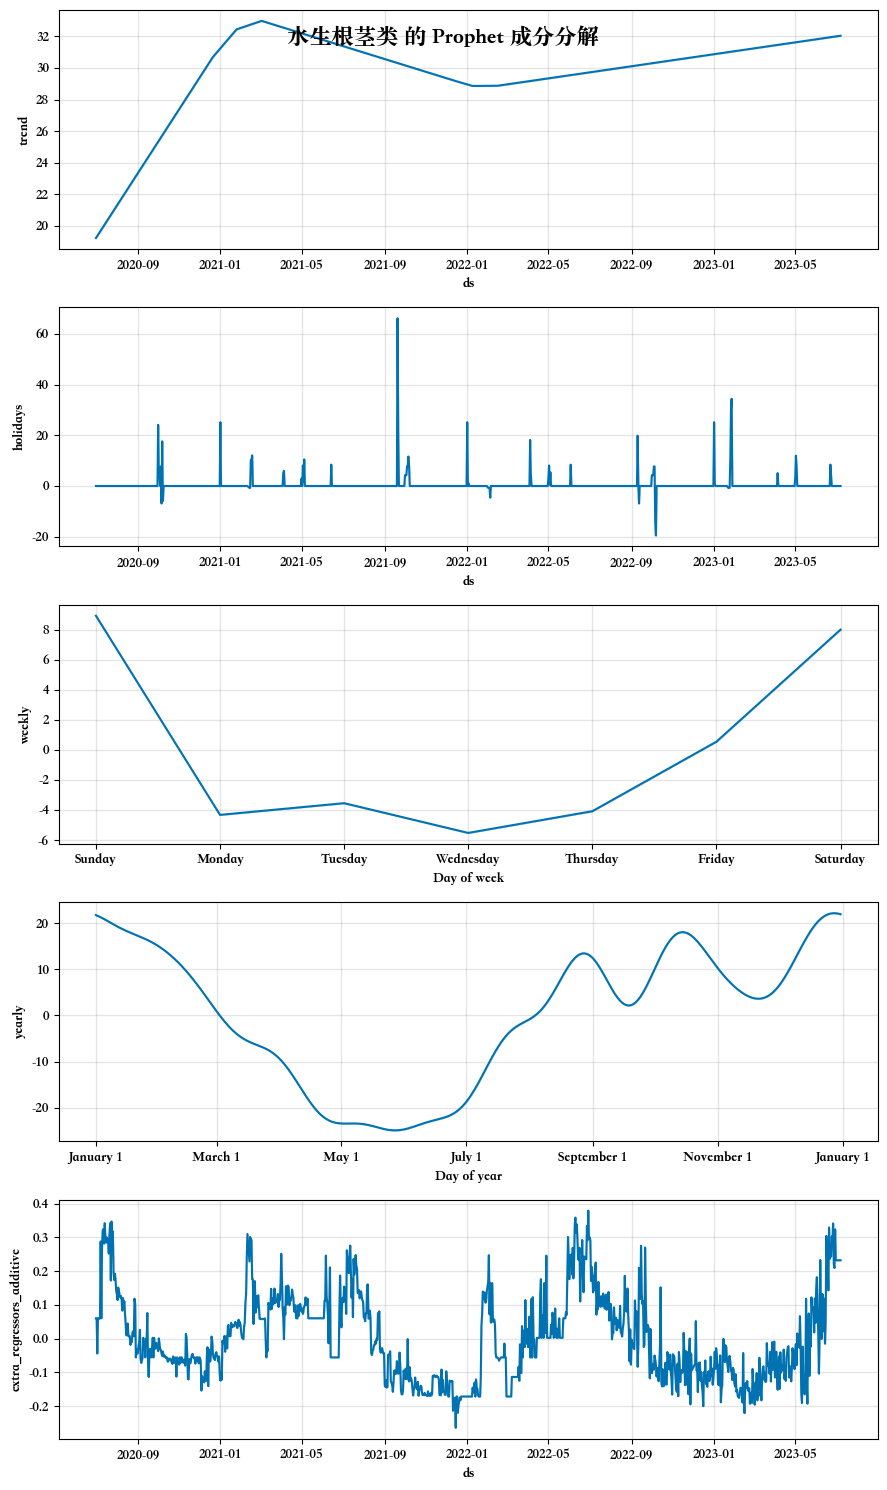

19:29:04 - cmdstanpy - INFO - Chain [1] start processing


正在处理品类: 花叶类


19:29:05 - cmdstanpy - INFO - Chain [1] done processing


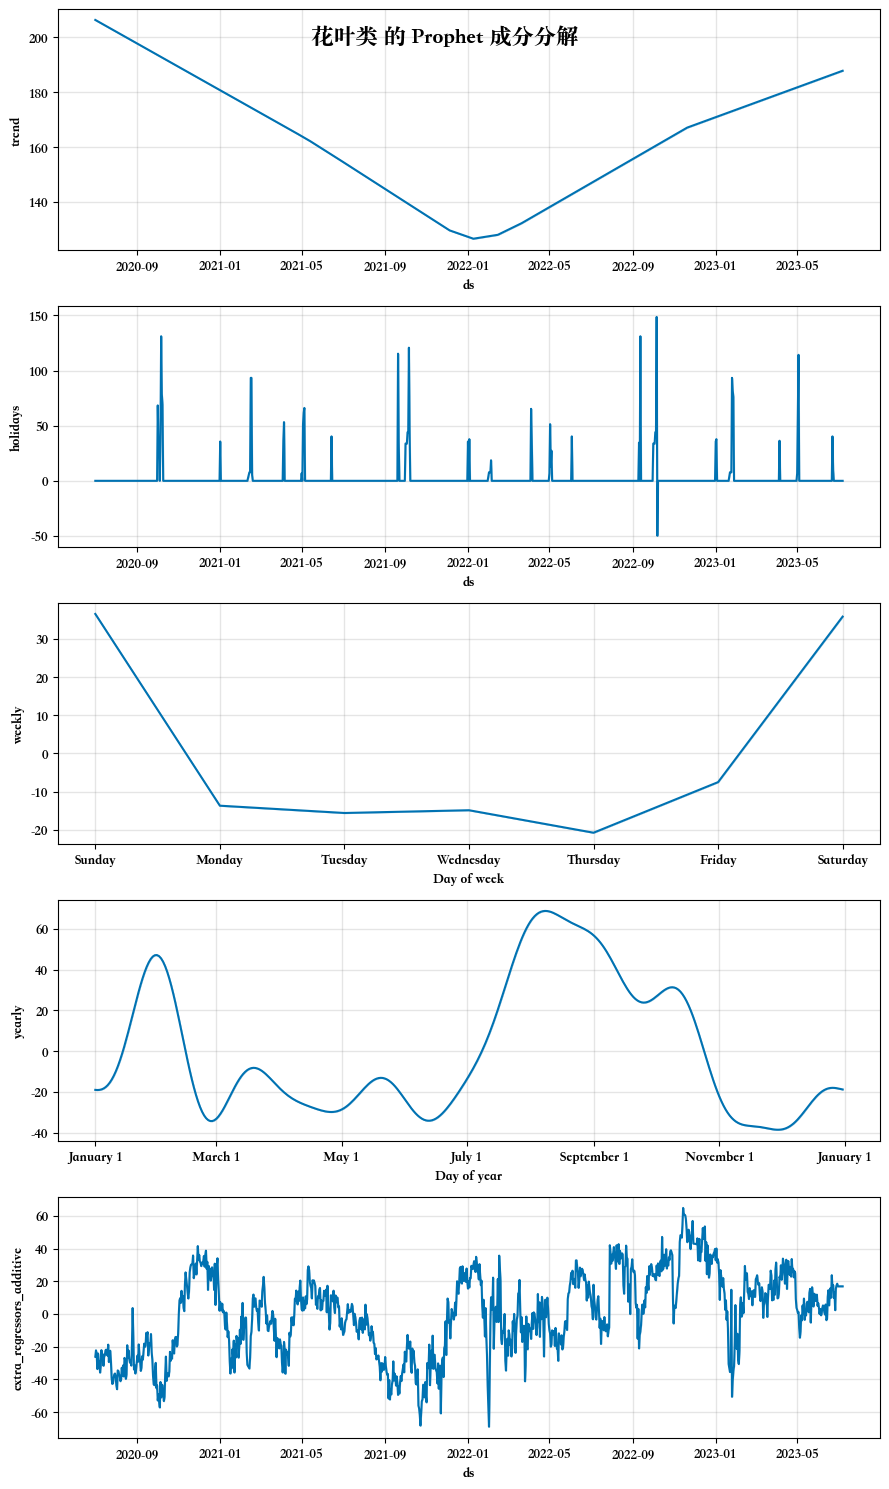

19:29:06 - cmdstanpy - INFO - Chain [1] start processing
19:29:06 - cmdstanpy - INFO - Chain [1] done processing


正在处理品类: 花菜类


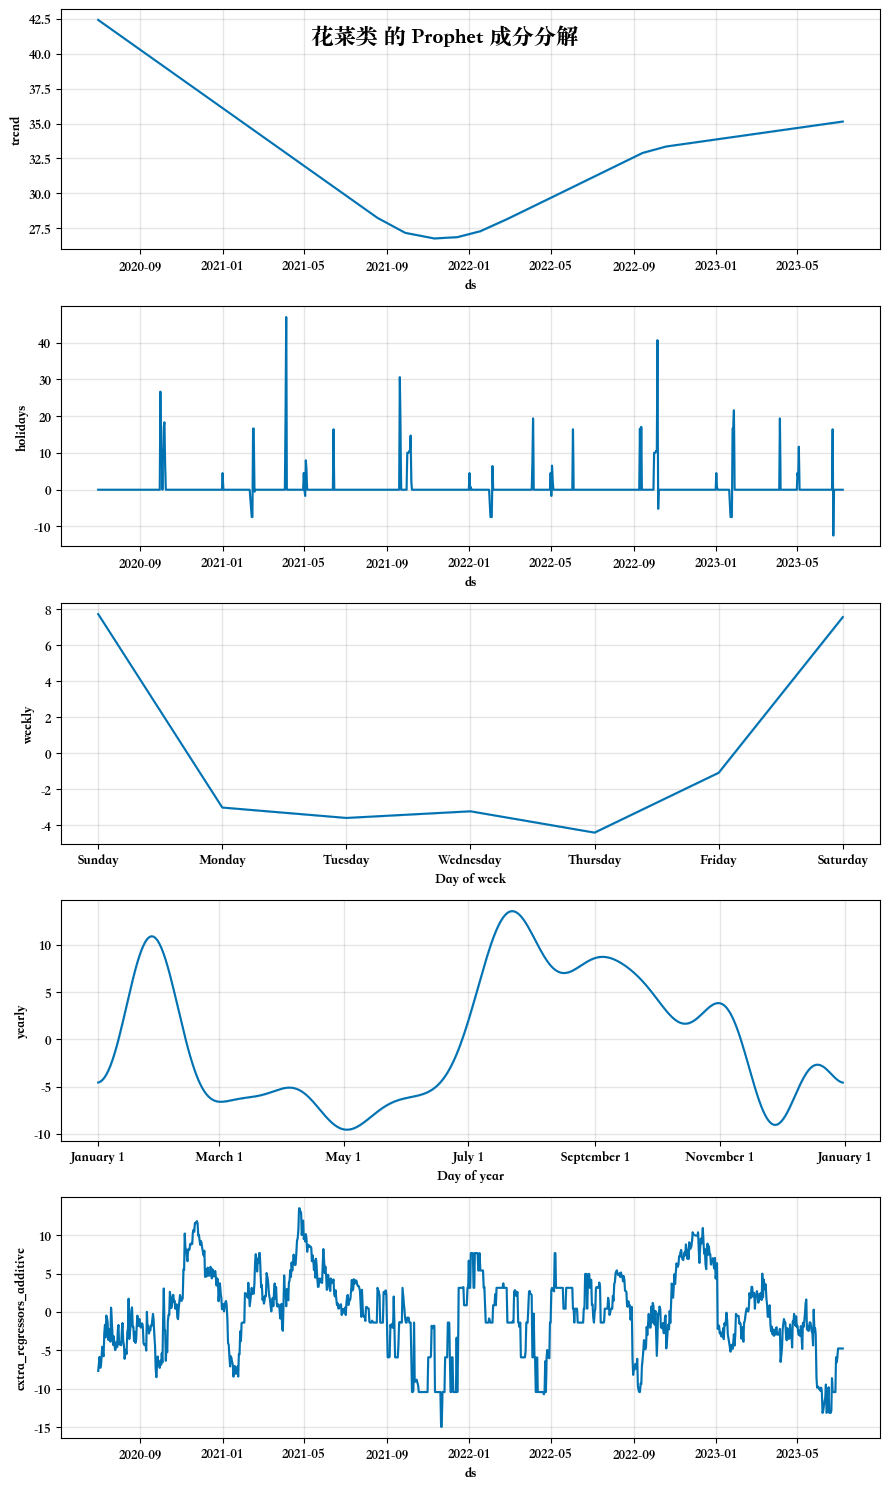

19:29:07 - cmdstanpy - INFO - Chain [1] start processing
19:29:07 - cmdstanpy - INFO - Chain [1] done processing


正在处理品类: 茄类


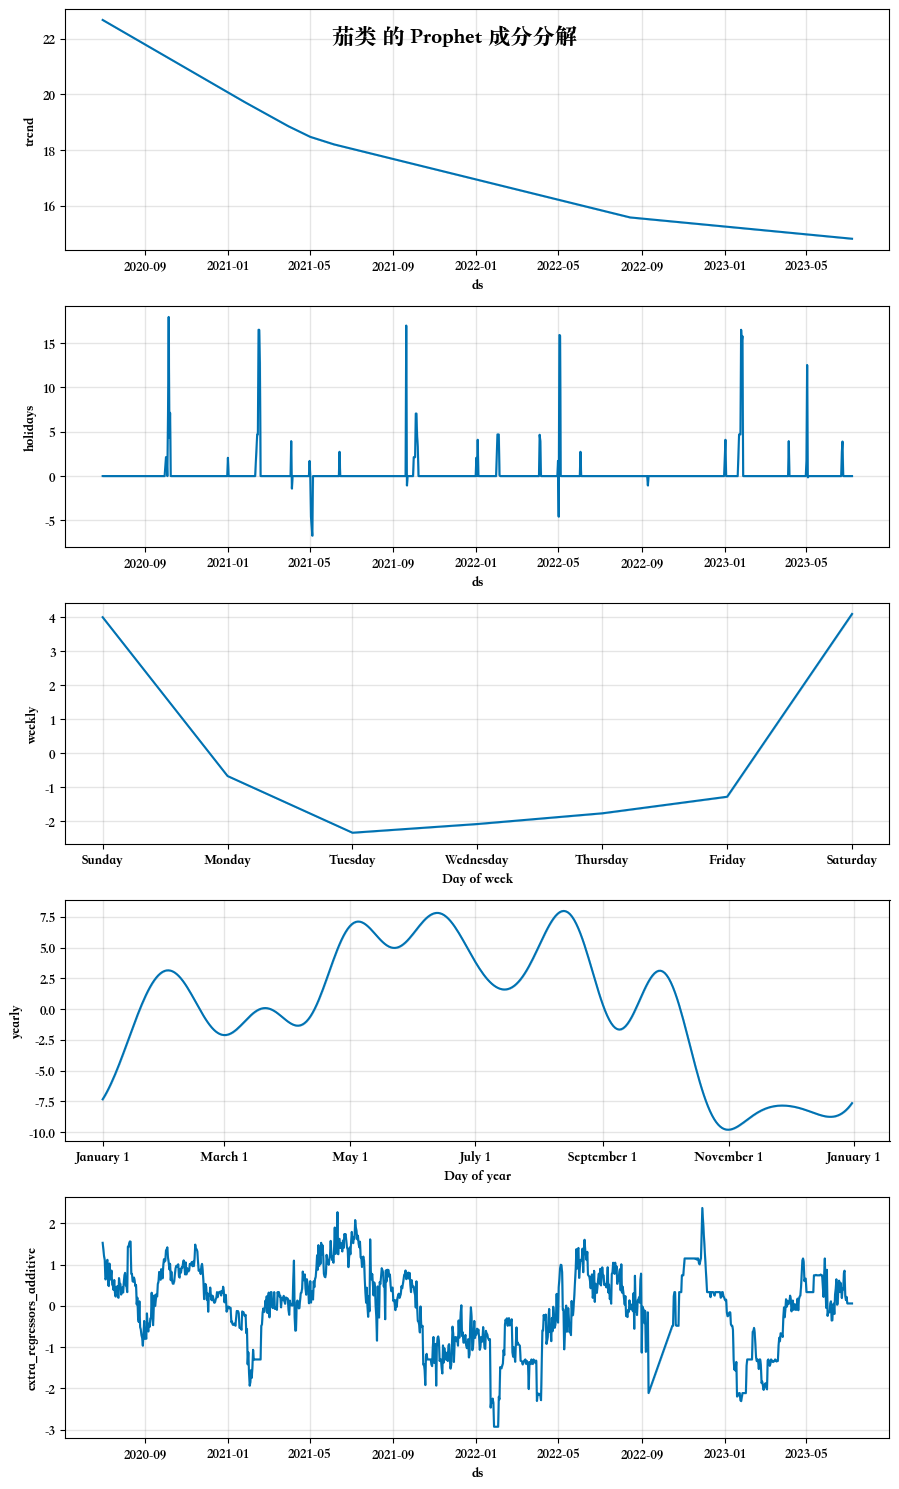

19:29:08 - cmdstanpy - INFO - Chain [1] start processing
19:29:08 - cmdstanpy - INFO - Chain [1] done processing


正在处理品类: 辣椒类


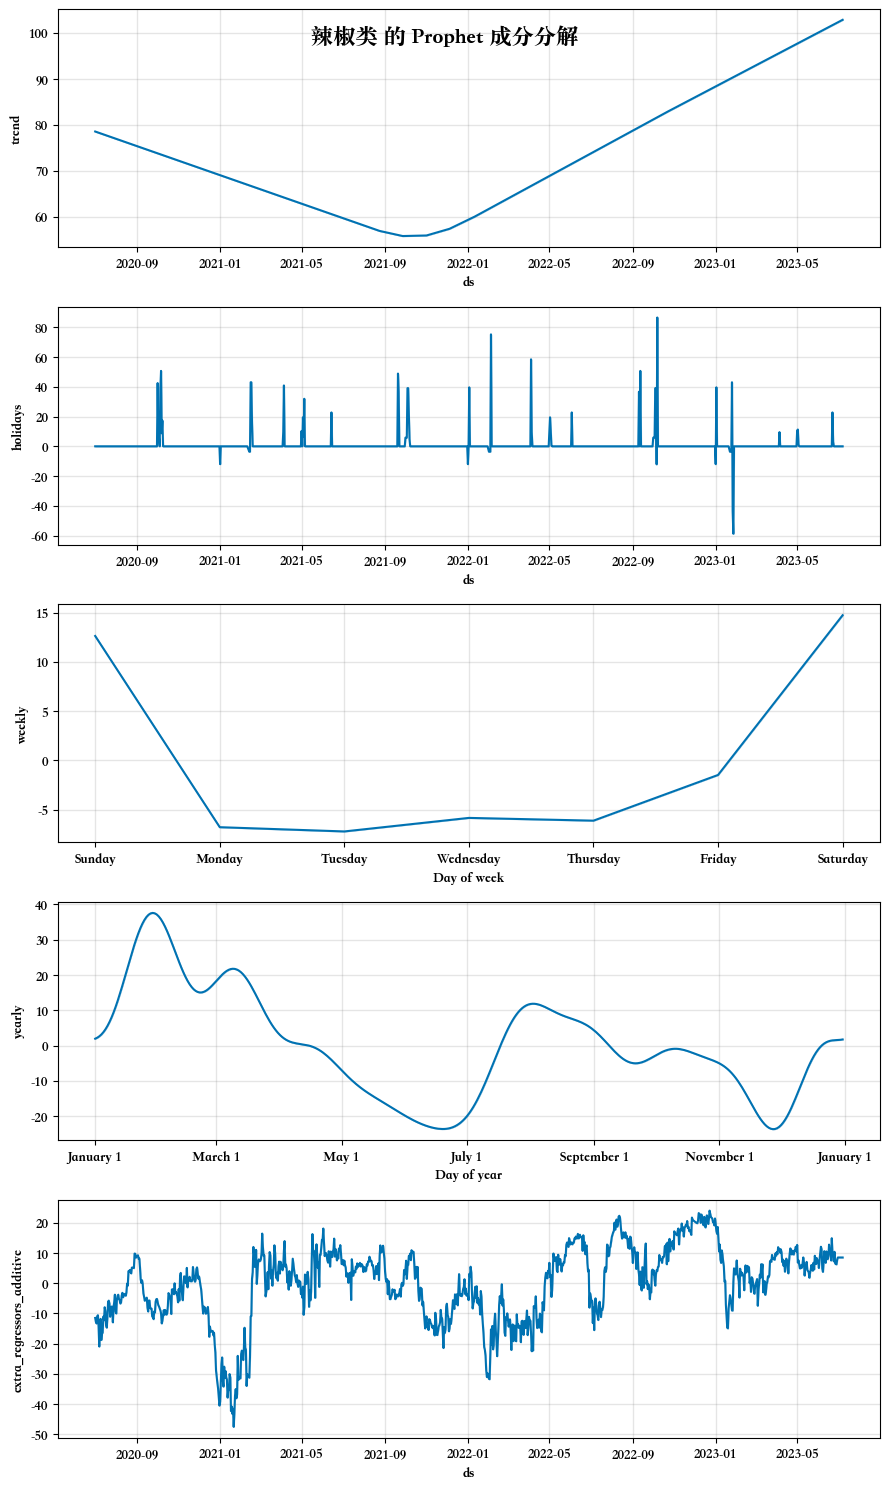

19:29:09 - cmdstanpy - INFO - Chain [1] start processing
19:29:09 - cmdstanpy - INFO - Chain [1] done processing


正在处理品类: 食用菌


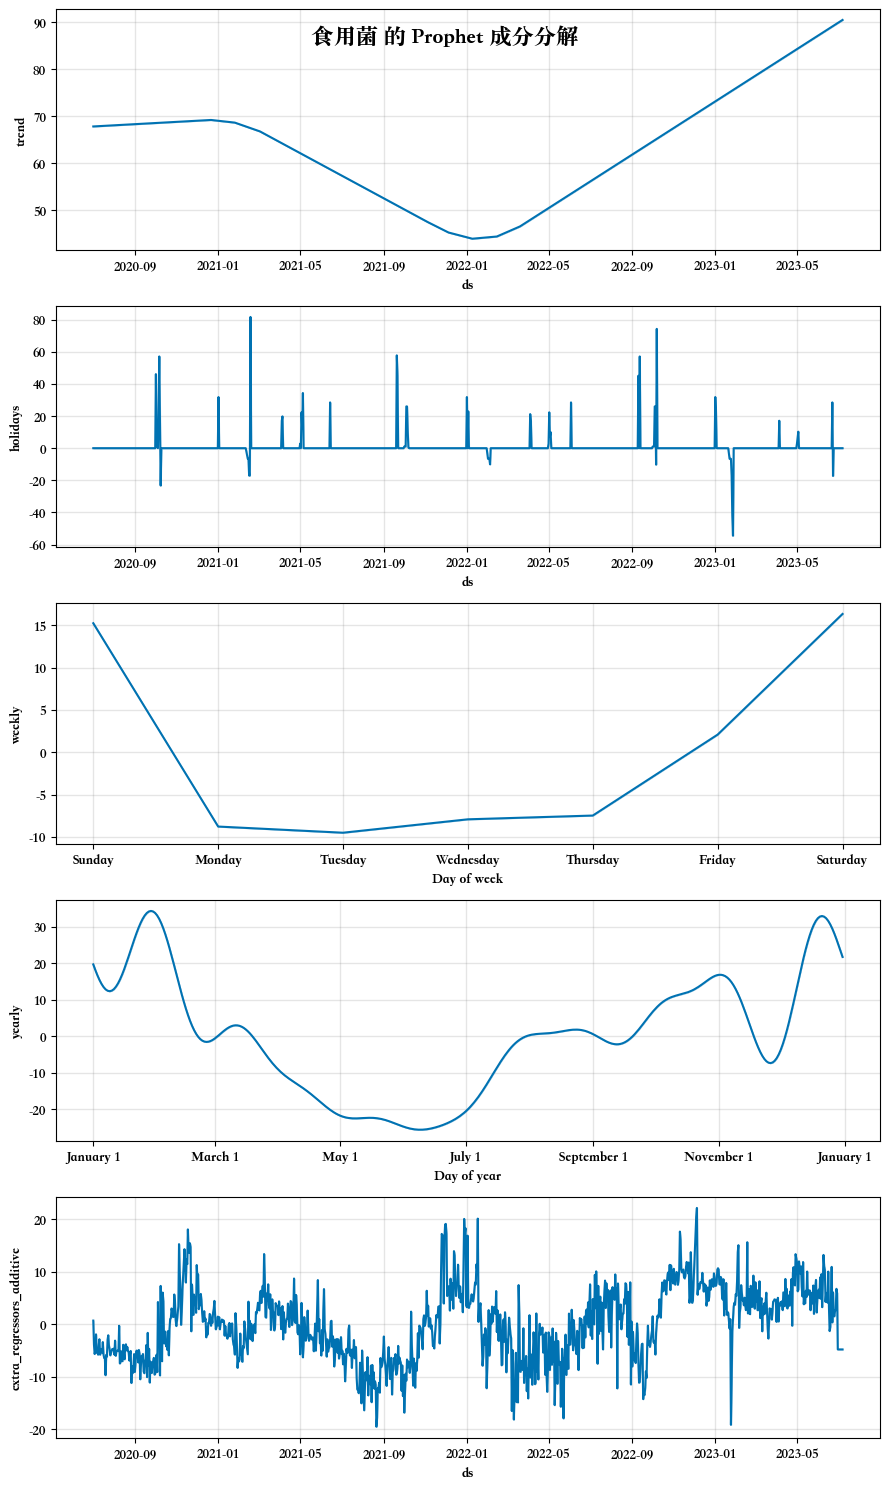


预测结果:
水生根茎类: [21.22074533 22.70926435 10.06446773 11.50404419 10.22858225 12.41755078
 17.82575354]
花叶类: [225.39564247 227.83219221 179.44815786 179.3817169  182.01011321
 178.10419912 193.40179698]
花菜类: [39.60765165 40.48596977 30.47010046 30.64216677 31.7739424  31.35889769
 35.45424427]
茄类: [22.97453814 22.59582558 17.65498302 15.72917784 15.7408719  15.82817656
 16.10484965]
辣椒类: [105.19744714 103.88115711  85.36221981  85.88304742  88.28905201
  89.12133154  94.94323077]
食用菌: [80.66910585 80.17812008 56.7825556  56.74716934 59.07136387 60.2985213
 70.69886231]


In [21]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Songti SC']  # 替换为中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# 确保日期列为 datetime 格式
df_pivoted["ds"] = pd.to_datetime(df_pivoted["ds"])

# 遍历每个品类
forecast_results = {}
for col in df_pivoted.columns:
    if "_sales" in col:
        # 当前品类名
        category = col.replace("_sales", "")
        print(f"正在处理品类: {category}")

        # 提取销量数据
        df_sales = df_pivoted[["ds", col]].rename(columns={col: "y"})
        df_sales = df_sales[df_sales["y"] > 0]  # 过滤销量为正的数据

        # 提取对应价格数据
        price_col = f"{category}_price"
        if price_col in df_pivoted.columns:
            price_df = df_pivoted[["ds", price_col]].rename(columns={price_col: "price"})
        else:
            print(f"警告：{category} 没有价格数据，跳过！")
            continue

        # 合并销量和价格
        merged_df = pd.merge(df_sales, price_df, on="ds")

        # 初始化 Prophet 模型
        model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
        model.add_country_holidays(country_name="CN")  # 添加中国节假日
        model.add_regressor("price")  # 添加价格作为外生变量

        # 训练模型
        model.fit(merged_df)

        # 生成未来 7 天的预测
        future = model.make_future_dataframe(periods=7)
        future = pd.merge(future, price_df, on="ds", how="left")
        future["price"] = future["price"].fillna(method="ffill").fillna(method="bfill").fillna(0)

        # 预测
        forecast = model.predict(future)

        # 提取预测结果
        forecast_values = forecast[["ds", "yhat"]].tail(7)
        forecast_results[category] = forecast_values["yhat"].values  # 保存结果

        # 绘制成分分解图
        fig = model.plot_components(forecast)
        plt.suptitle(f"{category} 的 Prophet 成分分解", fontsize=16)
        plt.show()

# 输出预测结果
print("\n预测结果:")
for category, values in forecast_results.items():
    print(f"{category}: {values}")


测试

In [10]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from prophet import Prophet

# # 确保日期列为 datetime 格式
# df_pivoted["ds"] = pd.to_datetime(df_pivoted["ds"])

# # 对整个 DataFrame 进行插值，减少缺失值影响
# df_pivoted = df_pivoted.interpolate(method="linear", axis=0, limit_direction="both")

# # 创建存储 f(P_i(t)) 的 DataFrame
# f_p_results = pd.DataFrame()

# # Step 1: Prophet 模型构建和拟合
# for col in df_pivoted.columns:
#     if "_sales" in col:
#         sales_col = col.replace("_sales", "")
#         print(f"正在处理品类: {sales_col}")

#         # 提取销量数据
#         original_sales = df_pivoted[["ds", col]].rename(columns={col: "y"})

#         # 提取对应价格数据
#         price_col = f"{sales_col}_price"
#         if price_col in df_pivoted.columns:
#             price_df = df_pivoted[["ds", price_col]].rename(columns={price_col: "price"})
#         else:
#             print(f"警告：{sales_col} 没有定价数据，跳过！")
#             continue

#         # 合并销量和价格数据，并丢弃缺失值的行
#         merged_df = pd.merge(original_sales, price_df, on="ds")
#         merged_df = merged_df.dropna()
#         if len(merged_df) < 5:  # 至少需要 5 个数据点
#             print(f"跳过 {sales_col}：有效数据点不足。")
#             continue

#         # 初始化 Prophet 模型
#         model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
#         model.add_country_holidays(country_name="CN")  # 添加中国节假日
#         model.add_regressor("price")  # 添加价格作为外生变量

#         # 训练模型
#         model.fit(merged_df)

#         # 提取历史分解成分
#         forecast_full = model.predict(merged_df)
#         merged_df["trend"] = forecast_full["trend"]
#         merged_df["seasonal"] = forecast_full["weekly"] + forecast_full["yearly"]
#         merged_df["holiday"] = forecast_full.get("holidays", 0)

#         # 计算 f(P_i(t))
#         merged_df["f_p"] = merged_df["y"] - (
#             merged_df["trend"] + merged_df["seasonal"] + merged_df["holiday"]
#         )

#         # 保存 f(P_i(t))
#         f_p_col_name = f"{sales_col}_f_p"
#         merged_df = merged_df[["ds", "f_p", "price"]].rename(columns={"f_p": f_p_col_name})
#         if f_p_results.empty:
#             f_p_results = merged_df
#         else:
#             f_p_results = pd.merge(f_p_results, merged_df, on="ds", how="outer")

#         # 可选：绘制 f(P_i(t))
#         plt.figure(figsize=(10, 6))
#         plt.plot(merged_df["ds"], merged_df[f_p_col_name], label=f"{sales_col} f(P_i(t))")
#         plt.xlabel("日期")
#         plt.ylabel("f(P_i(t))")
#         plt.title(f"{sales_col} 的 f(P_i(t)) 变化趋势")
#         plt.legend()
#         plt.grid()
#         plt.show()

#         # 绘制 f(P_i(t)) 与价格的散点图
#         plt.figure(figsize=(10, 6))
#         plt.scatter(merged_df["price"], merged_df[f_p_col_name], alpha=0.7)
#         plt.xlabel("价格")
#         plt.ylabel(f"{sales_col} f(P_i(t))")
#         plt.title(f"{sales_col} 的 f(P_i(t)) 与价格的关系")
#         plt.grid()
#         plt.show()

# # 保存所有品类的 f(P_i(t)) 结果为 CSV 文件
# f_p_results.to_csv("f_p_results.csv", index=False)
# print("所有品类的 f(P_i(t)) 已保存为 f_p_results.csv 文件。")


NameError: name 'df_pivoted' is not defined

### 拟合(f_p)数据

19:29:29 - cmdstanpy - INFO - Chain [1] start processing
19:29:29 - cmdstanpy - INFO - Chain [1] done processing


正在处理品类: 水生根茎类


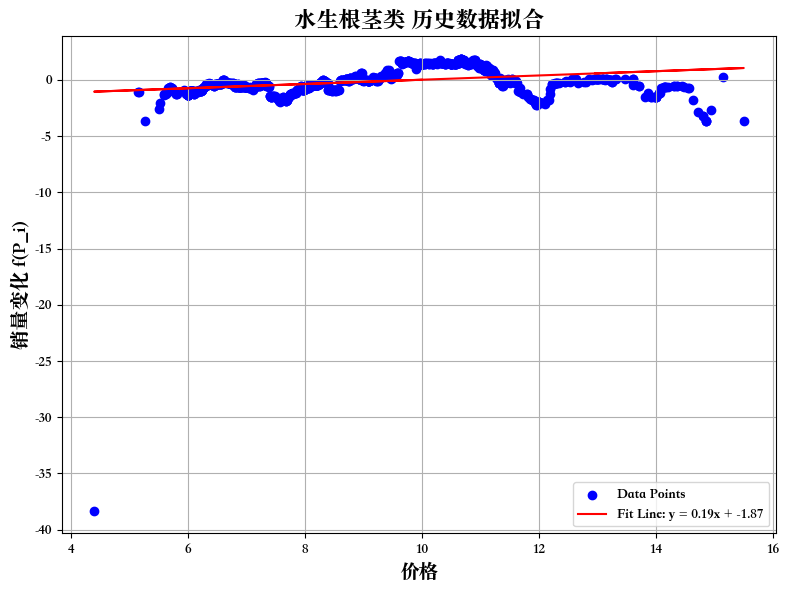

19:29:29 - cmdstanpy - INFO - Chain [1] start processing


正在处理品类: 花叶类


19:29:30 - cmdstanpy - INFO - Chain [1] done processing


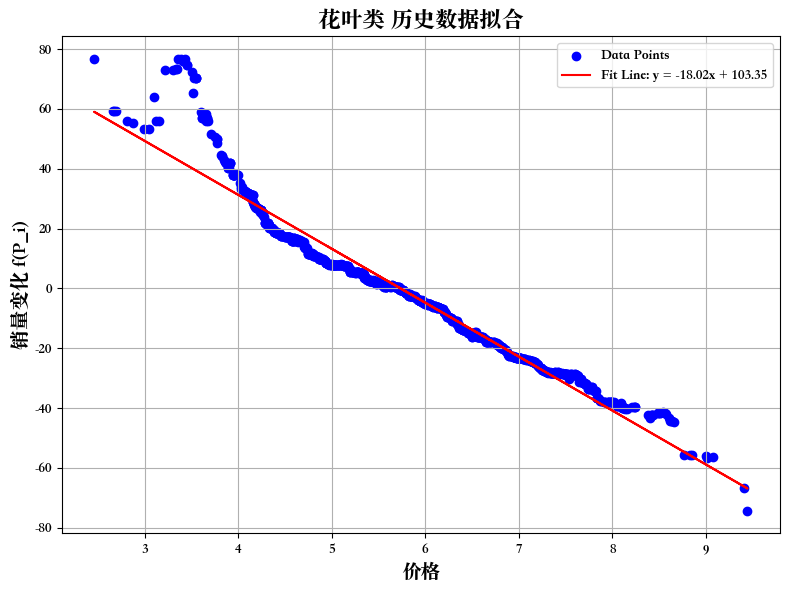

19:29:30 - cmdstanpy - INFO - Chain [1] start processing
19:29:30 - cmdstanpy - INFO - Chain [1] done processing


正在处理品类: 花菜类


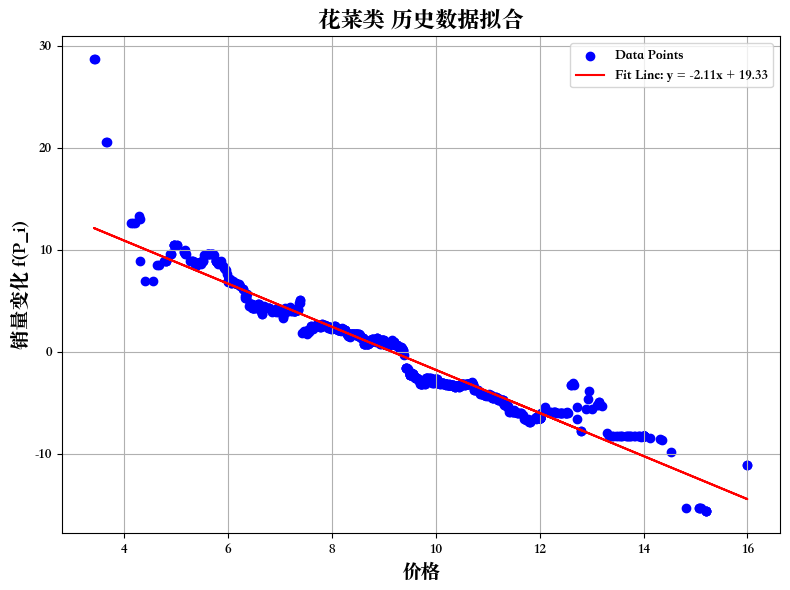

19:29:31 - cmdstanpy - INFO - Chain [1] start processing
19:29:31 - cmdstanpy - INFO - Chain [1] done processing


正在处理品类: 茄类


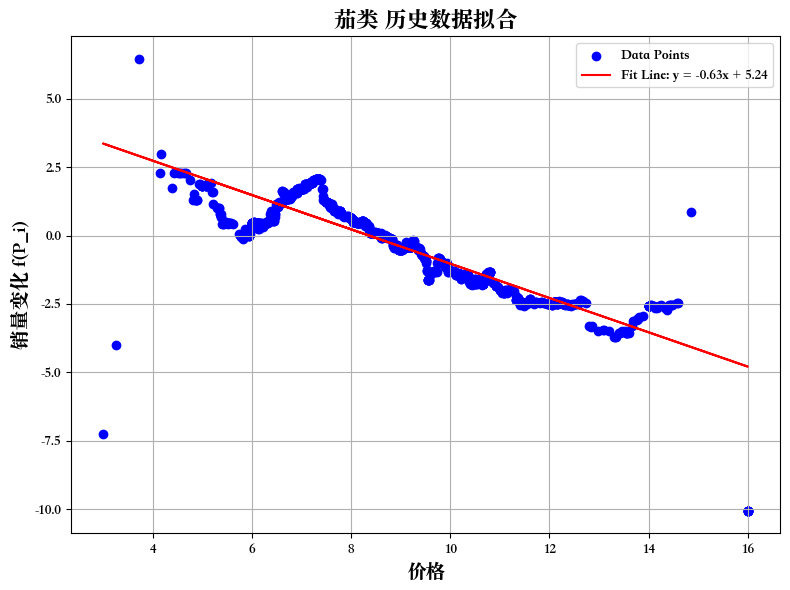

19:29:31 - cmdstanpy - INFO - Chain [1] start processing
19:29:31 - cmdstanpy - INFO - Chain [1] done processing


正在处理品类: 辣椒类


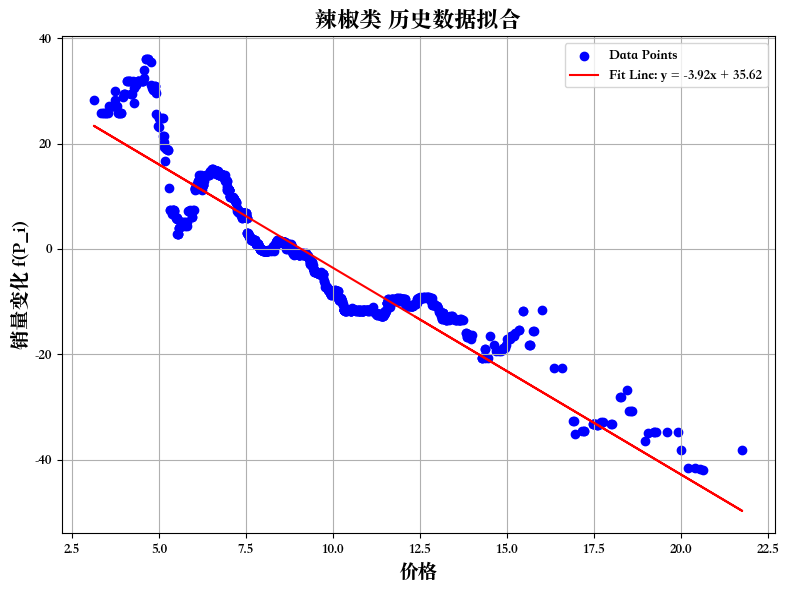

19:29:32 - cmdstanpy - INFO - Chain [1] start processing
19:29:32 - cmdstanpy - INFO - Chain [1] done processing


正在处理品类: 食用菌


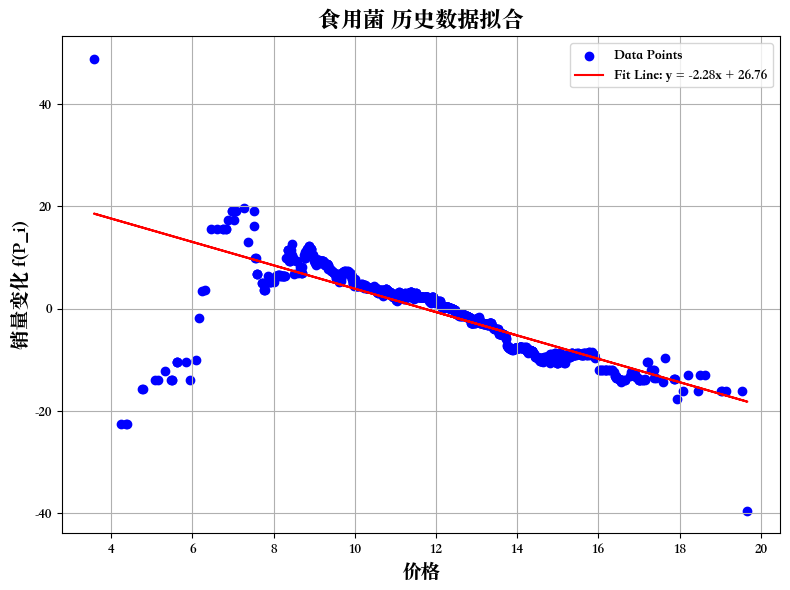

回归系数和偏效应表格:


,Category,Regression Coefficient,Intercept,Correlation Coefficient,Bias Effect
0,水生根茎类,0.189554,-1.872248,0.266452,-0.004366
1,花叶类,-18.023981,103.351115,-0.972733,0.002919
2,花菜类,-2.111655,19.327797,-0.964603,-0.003449
3,茄类,-0.627174,5.242084,-0.869271,0.000730
4,辣椒类,-3.920756,35.622581,-0.933429,-0.003271
5,食用菌,-2.284012,26.758282,-0.803339,0.002063


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from prophet import Prophet

plt.rcParams['font.sans-serif'] = ['Songti SC']  # 替换为中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 确保日期列为 datetime 格式
df_pivoted["ds"] = pd.to_datetime(df_pivoted["ds"])

regression_metrics = []  # 用于存储回归系数和偏效应

# 对整个 DataFrame 进行插值，减少缺失值影响
df_pivoted = df_pivoted.interpolate(method="linear", axis=0, limit_direction="both")

# Step 1: Prophet 模型构建和拟合
for col in df_pivoted.columns:
    if "_sales" in col:
        sales_col = col.replace("_sales", "")
        print(f"正在处理品类: {sales_col}")

        # 提取销量数据
        original_sales = df_pivoted[["ds", col]].rename(columns={col: "y"})

        # 提取对应价格数据
        price_col = f"{sales_col}_price"
        if price_col in df_pivoted.columns:
            price_df = df_pivoted[["ds", price_col]].rename(columns={price_col: "price"})
        else:
            print(f"警告：{sales_col} 没有定价数据，跳过！")
            continue

        # 合并销量和价格数据，并丢弃缺失值的行
        merged_df = pd.merge(original_sales, price_df, on="ds")
        merged_df = merged_df.dropna()
        if len(merged_df) < 5:  # 至少需要 5 个数据点
            print(f"跳过 {sales_col}：有效数据点不足。")
            continue

        # 初始化 Prophet 模型
        model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
        model.add_country_holidays(country_name="CN")  # 添加中国节假日
        model.add_regressor("price")  # 添加价格作为外生变量

        # 训练模型
        model.fit(merged_df)

        # 提取历史分解成分
        forecast_full = model.predict(merged_df)
        merged_df["trend"] = forecast_full["trend"]
        merged_df["seasonal"] = forecast_full["weekly"] + forecast_full["yearly"]
        merged_df["holiday"] = forecast_full.get("holidays", 0)

        # 计算 f(P_i(t))
        merged_df["f_p"] = merged_df["y"] - (
            merged_df["trend"] + merged_df["seasonal"] + merged_df["holiday"]
        )


        # 数据平滑（邻域中值法）
        def calculate_local_median(prices, f_p_values, threshold=0.6):
            median_f_p = []
            for i, p in enumerate(prices):
                # 找到价格差距在阈值以内的邻域数据点
                neighbor_indices = np.where(abs(prices - p) <= threshold)[0]
                median_f_p.append(np.median(f_p_values[neighbor_indices]))
            return np.array(median_f_p)

        pricing_index = merged_df["price"].values
        f_p_values = merged_df["f_p"].values
        smoothed_f_p = calculate_local_median(pricing_index, f_p_values)

        # 检查是否满足拟合条件
        if len(pricing_index) == len(smoothed_f_p) and np.std(pricing_index) > 0 and np.std(smoothed_f_p) > 0:
            # 线性拟合
            fit_params = np.polyfit(pricing_index, smoothed_f_p, 1)
            sensitivity = fit_params[0]
            intercept = fit_params[1]

            # 计算相关系数
            correlation, _ = pearsonr(pricing_index, smoothed_f_p)

            # 绘制散点图和拟合直线
            plt.figure(figsize=(8, 6))
            plt.scatter(pricing_index, smoothed_f_p, color="blue", label="Data Points")
            plt.plot(pricing_index, np.polyval(fit_params, pricing_index), color="red", label=f"Fit Line: y = {sensitivity:.2f}x + {intercept:.2f}")
            plt.title(f"{sales_col} 历史数据拟合", fontsize=16)
            plt.xlabel("价格", fontsize=14)
            plt.ylabel("销量变化 f(P_i)", fontsize=14)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print(f"跳过拟合 for {sales_col} due to insufficient data or zero variance.")
            sensitivity = np.nan
            intercept = np.nan
            correlation = np.nan

        # 偏效应取均值
        bias_effect = merged_df["f_p"].mean()

        regression_metrics.append({
            "Category": sales_col,
            "Regression Coefficient": sensitivity,
            "Intercept": intercept,
            "Correlation Coefficient": correlation,
            "Bias Effect": bias_effect
        })

# 生成回归结果表格
regression_df = pd.DataFrame(regression_metrics)
print("回归系数和偏效应表格:")
display(regression_df)


### 模拟退火


综合结果（回归+预测）:


,Category,Regression Coefficient,Intercept,Correlation Coefficient,Bias Effect,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Expected_Sales_Day_1,Expected_Sales_Day_2,Expected_Sales_Day_3,Expected_Sales_Day_4,Expected_Sales_Day_5,Expected_Sales_Day_6,Expected_Sales_Day_7
0,水生根茎类,-0.007837,-0.852326,-0.008272,0.011067,27.175078,25.739573,13.300117,15.057836,14.867669,16.141757,21.206412,-1.065303,-1.054053,-0.956562,-0.970337,-0.968847,-0.978832,-1.018525
1,花叶类,-19.667878,112.620412,-0.966326,-0.020475,225.892594,224.234233,176.494905,175.453511,178.454088,176.563113,189.735165,-4330.207505,-4297.591060,-3358.659805,-3338.177784,-3397.192775,-3360.001311,-3619.067612
2,花菜类,-2.385754,22.180842,-0.979228,-0.012580,42.500040,42.798681,31.621309,32.050879,33.163989,32.641474,37.284069,-79.213778,-79.926262,-53.259807,-54.284654,-56.940261,-55.693670,-66.769757
3,茄类,-0.677845,5.555638,-0.857708,0.002046,25.711131,25.139259,20.090657,18.697675,18.216389,18.359881,19.422965,-11.872527,-11.484887,-8.062717,-7.118490,-6.792252,-6.889518,-7.610125
4,辣椒类,-3.977546,36.069774,-0.935395,0.010623,105.388245,105.517674,86.158483,86.629657,89.018236,89.874993,95.940511,-383.116802,-383.631611,-306.629545,-308.503658,-318.004343,-321.412130,-345.538010
5,食用菌,-2.239194,26.216099,-0.797832,0.013400,80.937561,80.306448,56.865426,56.880562,59.193986,60.573967,71.054186,-155.018834,-153.605650,-101.116644,-101.150538,-106.330742,-109.420790,-132.888036


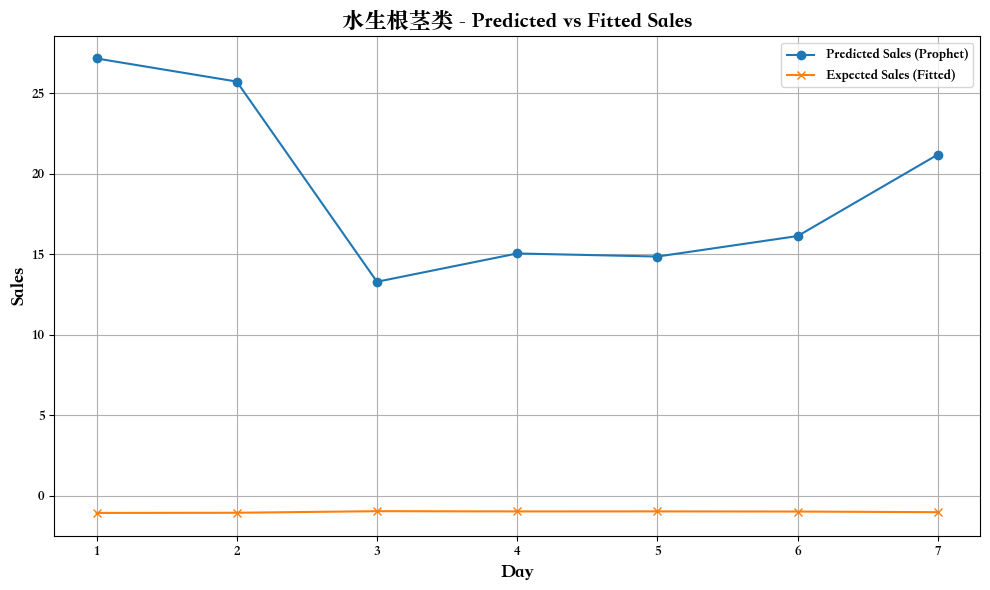

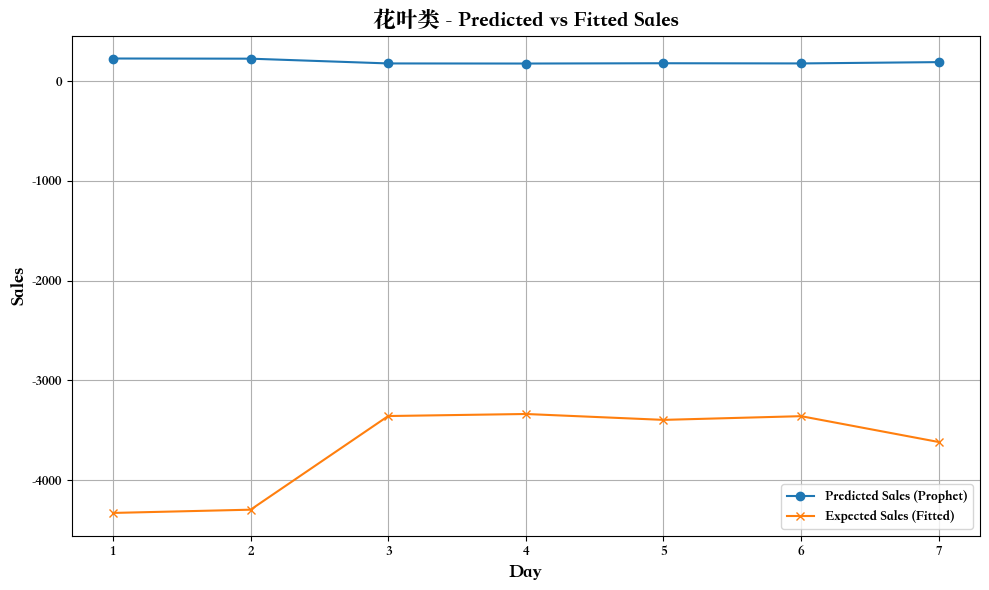

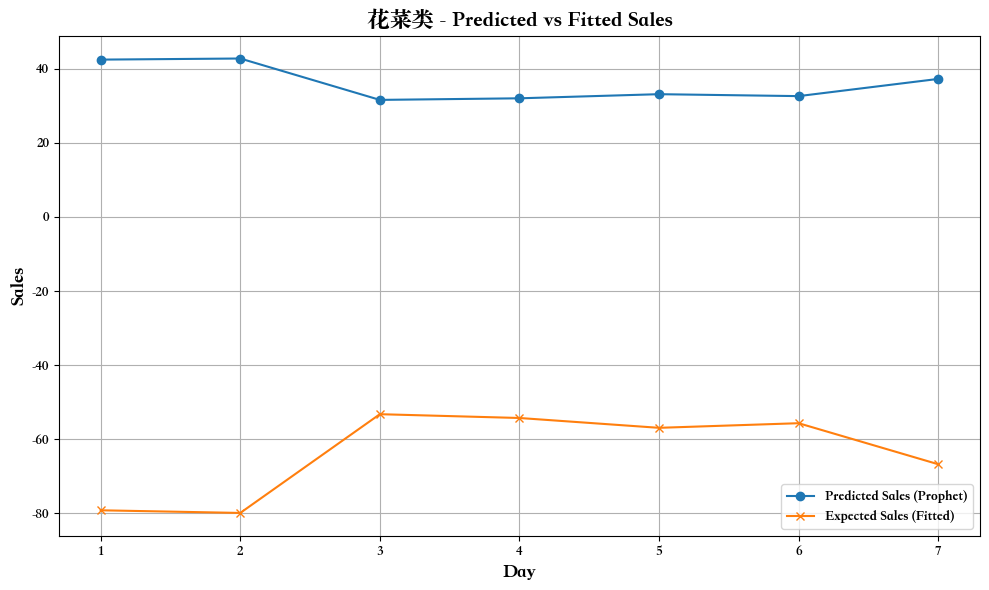

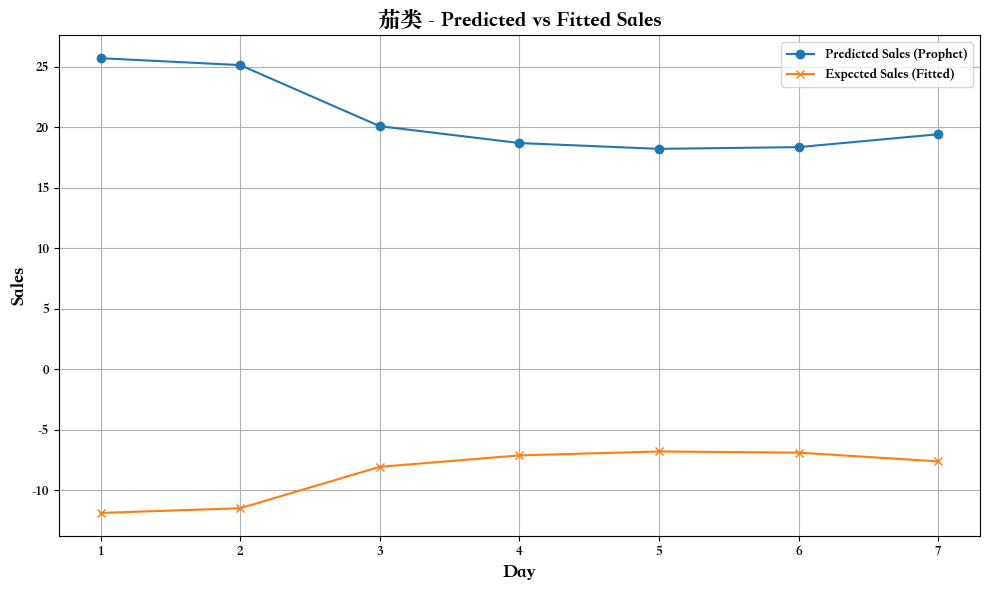

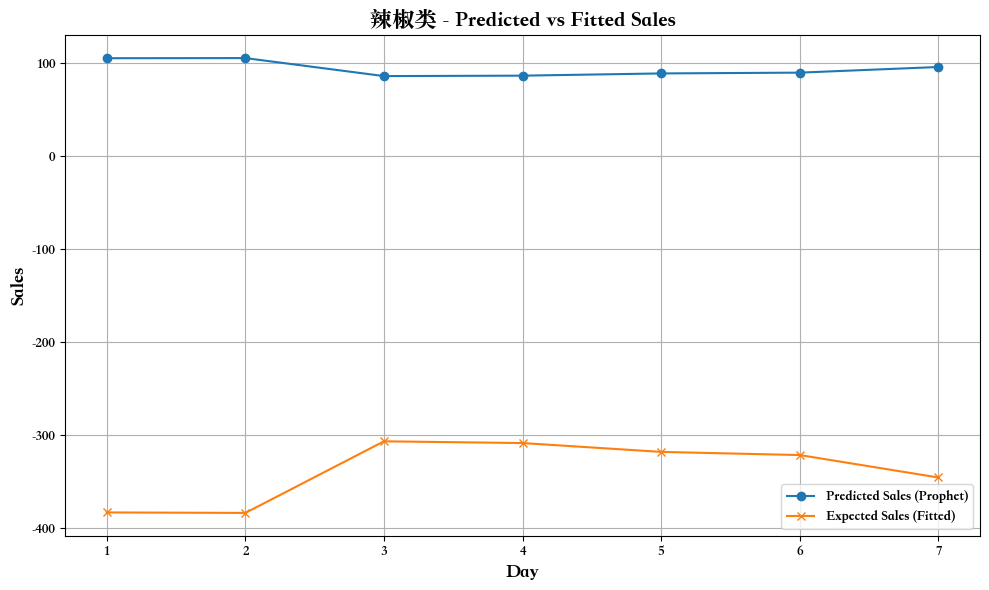

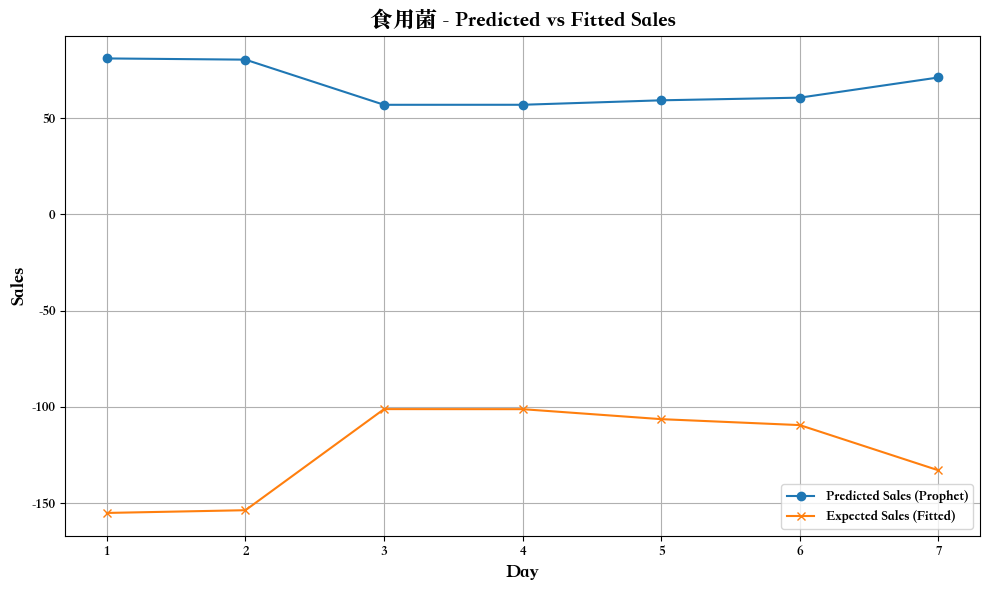

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取回归系数和预测结果
regression_df = pd.DataFrame(regression_metrics)  # 回归系数和敏感性结果
forecast_df = pd.DataFrame(forecast_results).T  # 预测结果转置
forecast_df.columns = [f"Day_{i+1}" for i in range(forecast_df.shape[1])]

# 合并回归结果和预测结果
merged_results = regression_df.merge(forecast_df, left_on="Category", right_index=True)

# 增加分析列
for i in range(1, 8):  # 遍历未来 7 天的预测
    day_col = f"Day_{i}"
    merged_results[f"Expected_Sales_{day_col}"] = (
        merged_results["Regression Coefficient"] * merged_results[day_col] +
        merged_results["Intercept"]
    )

# 输出分析结果
print("\n综合结果（回归+预测）:")
display(merged_results)

# 可视化每个品类的预测销量和拟合影响
for _, row in merged_results.iterrows():
    category = row["Category"]
    actual_sales = row[[f"Day_{i}" for i in range(1, 8)]].values
    expected_sales = row[[f"Expected_Sales_Day_{i}" for i in range(1, 8)]].values

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 8), actual_sales, label="Predicted Sales (Prophet)", marker="o")
    plt.plot(range(1, 8), expected_sales, label="Expected Sales (Fitted)", marker="x")
    plt.title(f"{category} - Predicted vs Fitted Sales", fontsize=16)
    plt.xlabel("Day", fontsize=14)
    plt.ylabel("Sales", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
display(df_pivoted)

In [ ]:
# import pandas as pd
# from prophet import Prophet
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import numpy as np
# from scipy.stats import pearsonr
# plt.rcParams['font.sans-serif'] = ['Songti SC']  # 替换为你的中文字体
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# # 构建 sales_price_data 列表
# sales_price_data = []
# for category in categories:
#     for date, metrics in pricing_index[category].items():
#         sales_data = category_daily_sales[category].get(date, None)  # 不填充缺失值
#         price_index = metrics['定价指数']
#         sales_price_data.append({
#             "ds": date,
#             f"{category}_sales": sales_data,
#             f"{category}_price": price_index
#         })

# # 构建数据框
# sales_price_df = pd.DataFrame(sales_price_data)

# # 显示结果
# print("sales_price_data:")
# for entry in sales_price_data:
#     print(entry)

# print("\nsales_price_df:")
# display(sales_price_df)





# # Step 2: 构建并训练Prophet模型
# forecast_results = {}
# for col in sales_price_df.columns[1:]:  # 遍历每个品类的列
#     if "_sales" in col:
#         # 提取当前品类的销量
#         df_sales = sales_price_df[["ds", col]].rename(columns={col: "y"})
#         df_sales = df_sales[df_sales["y"] > 0]  # 过滤销量为正的数据

#         # 提取对应的价格列
#         price_col = col.replace("_sales", "_price")
#         price_df = sales_price_df[["ds", price_col]].rename(columns={price_col: "price"})

#         # 合并数据
#         merged_df = pd.merge(df_sales, price_df, on="ds")

#         # 初始化 Prophet 模型
#         model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
#         model.add_country_holidays(country_name='CN')  # 添加中国节假日
#         model.add_regressor("price")  # 添加价格作为外生变量

#         # 训练模型
#         model.fit(merged_df)

#         # 生成未来 7 天的预测
#         future = model.make_future_dataframe(periods=7)
#         future = pd.merge(future, price_df, on="ds", how="left")  # 合并价格数据

#         # 填充缺失值
#         future["price"] = future["price"].fillna(method="ffill").fillna(method="bfill").fillna(0)  # 处理缺失值

#         # 进行预测
#         forecast = model.predict(future)

#         # 提取预测结果
#         forecast_values = forecast[["ds", "yhat"]].tail(7)
#         forecast_results[col] = forecast_values["yhat"].values  # 将预测销量加入结果表

# # 输出预测结果
# print("预测结果:")
# for col, values in forecast_results.items():
#     print(f"{col}: {values}")


# # Step 3: 绘制 Prophet 成分分解
# import matplotlib.pyplot as plt

# for col in sales_price_df.columns[1:]:
#     if "_sales" in col:
#         # 提取当前品类的销量
#         df_sales = sales_price_df[["ds", col]].rename(columns={col: "y"})
#         df_sales = df_sales[df_sales["y"] > 0]  # 过滤销量为正的数据

#         # 提取对应的价格列
#         price_col = col.replace("_sales", "_price")
#         price_df = sales_price_df[["ds", price_col]].rename(columns={price_col: "price"})

#         # 合并数据
#         merged_df = pd.merge(df_sales, price_df, on="ds")

#         # 初始化 Prophet 模型
#         model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
#         model.add_country_holidays(country_name='CN')  # 添加中国节假日
#         model.add_regressor("price")  # 添加价格作为外生变量

#         # 训练模型
#         model.fit(merged_df)

#         # 生成未来 7 天的预测
#         future = model.make_future_dataframe(periods=7)
#         future = pd.merge(future, price_df, on="ds", how="left")  # 合并价格数据

#         # 填充缺失值
#         future["price"] = future["price"].fillna(method="ffill").fillna(method="bfill").fillna(0)

#         # 进行预测
#         forecast = model.predict(future)

#         # 提取成分分解图
#         fig = model.plot_components(forecast)
#         plt.suptitle(f"{col.replace('_sales', '')} Prophet 成分分解", fontsize=16)
#         plt.show()



In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import pearsonr
# from prophet import Prophet

# f_p_values = {}
# regression_metrics = []  # 用于存储回归系数和偏效应

# # Step 1: Prophet 模型构建和拟合
# for col in sales_price_df.columns:
#     if "_sales" in col:
#         sales_col = col.replace("_sales", "")
#         original_sales = sales_price_df[["ds", col]].rename(columns={col: "y"})

#         # 初始化 Prophet 模型
#         model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
#         model.add_country_holidays(country_name='CN')  # 添加中国节假日

#         # 拟合模型
#         model.fit(original_sales)

#         # 提取历史分解成分
#         forecast = model.predict(original_sales)
#         original_sales["trend"] = forecast["trend"]
#         original_sales["seasonal"] = forecast["weekly"] + forecast["yearly"]
#         original_sales["holiday"] = forecast.get("holidays", 0)

#         # 计算 f(P_i(t))
#         original_sales["f_p"] = original_sales["y"] - (
#             original_sales["trend"] + original_sales["seasonal"] + original_sales["holiday"]
#         )

#         # 检查 f(P_i) 数据
#         print(f"检查 f(P_i) 数据 for {sales_col}:")
#         print(original_sales[["ds", "f_p"]])

#         # 提取定价指数
#         price_col = f"{sales_col}_price"
#         pricing_index = sales_price_df[price_col].values
#         print(f"定价指数长度 for {sales_col}: {len(pricing_index)}")
#         # 检查定价指数
#         print(f"检查定价指数 for {sales_col}:")
#         print(pricing_index)

#         # 数据平滑（邻域中值）
#         smoothed_prices = []
#         for price in pricing_index:
#             neighbors = pricing_index[(np.abs(pricing_index - price) <= 0.1)]  # 邻域范围
#             if len(neighbors) > 0:
#                 smoothed_prices.append(np.median(neighbors))
#             else:
#                 smoothed_prices.append(price)
#         smoothed_prices = np.array(smoothed_prices)

#         # 检查平滑后的定价指数
#         print(f"检查平滑后的定价指数 for {sales_col}:")
#         print(smoothed_prices[:10])

#         # 检查是否满足拟合条件
#         if len(smoothed_prices) == len(original_sales["f_p"].values) and np.std(smoothed_prices) > 0 and np.std(original_sales["f_p"].values) > 0:
#             # 线性拟合
#             fit_params = np.polyfit(smoothed_prices, original_sales["f_p"].values, 1)
#             sensitivity = fit_params[0]
#             intercept = fit_params[1]

#             # 检查拟合结果
#             print(f"拟合结果 for {sales_col}: Slope={sensitivity}, Intercept={intercept}")

#             # 计算相关系数
#             correlation, _ = pearsonr(smoothed_pric %es, original_sales["f_p"].values)
#             print(f"相关系数 for {sales_col}: {correlation}")

#             # 绘制散点图和拟合直线
#             plt.figure(figsize=(8, 6))
#             plt.scatter(smoothed_prices, original_sales["f_p"].values, color="blue", label="Data Points")
#             plt.plot(smoothed_prices, np.polyval(fit_params, smoothed_prices), color="red", label=f"Fit Line: y = {sensitivity:.2f}x + {intercept:.2f}")
#             plt.title(f"{sales_col} 历史数据拟合", fontsize=16)
#             plt.xlabel("定价指数", fontsize=14)
#             plt.ylabel("销量变化 f(P_i)", fontsize=14)
#             plt.legend()
#             plt.grid(True)
#             plt.tight_layout()
#             plt.show()
#         else:
#             print(f"跳过拟合 for {sales_col} due to insufficient data or zero variance.")
#             sensitivity = np.nan
#             intercept = np.nan
#             correlation = np.nan

#         # 偏效应取均值
#         bias_effect = original_sales["f_p"].mean()

#         regression_metrics.append({
#             "Category": sales_col,
#             "Regression Coefficient": sensitivity,
#             "Intercept": intercept,
#             "Correlation Coefficient": correlation,
#             "Bias Effect": bias_effect
#         })

# # 生成回归结果表格
# regression_df = pd.DataFrame(regression_metrics)
# print("回归系数和偏效应表格:")
# display(regression_df)


My version

In [ ]:
# 分析 f(P(t)) 和定价指数的数据点数量及分布情况
import pandas as pd
import numpy as np

# 创建数据框以存储分析结果
analysis_results = []

for col, forecast_values in forecast_results.items():
    sales_col = col.replace("_sales", "")
    original_sales = sales_price_df[["ds", col]].rename(columns={col: "original_sales"})

    # 清理重复数据
    sales_price_df = sales_price_df.drop_duplicates(subset="ds")
    forecast_df = pd.DataFrame({"ds": sales_price_df["ds"].tail(len(forecast_values)), "forecast_sales": forecast_values})
    forecast_df = forecast_df.drop_duplicates(subset="ds")

    # 合并预测值
    combined = pd.merge(original_sales, forecast_df, on="ds", how="inner")

    # 计算 f(P(t))
    combined["f_p"] = combined["forecast_sales"] - combined["original_sales"]
    combined["f_p"] = combined["f_p"].fillna(0)

    # 提取定价指数数据
    price_col = f"{sales_col}_price"
    pricing_index = sales_price_df[price_col].iloc[-len(combined):].values

    # 创建临时数据框
    temp_df = pd.DataFrame({
        "f_p": combined["f_p"].values,
        "pricing_index": pricing_index
    })

    # 分析 f(P(t)) 和定价指数的数据点数量及分布
    f_p_describe = temp_df["f_p"].describe()
    pricing_index_describe = temp_df["pricing_index"].describe()

    print(f"分析结果 for {sales_col}:")
    print("f(P(t)) 分布情况:")
    print(f_p_describe)
    print("定价指数分布情况:")
    print(pricing_index_describe)

    analysis_results.append({
        "Category": sales_col,
        "f_p_count": f_p_describe["count"],
        "pricing_index_count": pricing_index_describe["count"],
        "f_p_mean": f_p_describe["mean"],
        "pricing_index_mean": pricing_index_describe["mean"],
        "f_p_std": f_p_describe["std"],
        "pricing_index_std": pricing_index_describe["std"]
    })

# 将分析结果存储为 DataFrame
analysis_df = pd.DataFrame(analysis_results)
print("总体分析结果:")
display(analysis_df)


In [ ]:
# Step 4: 绘制散点图并进行线性拟合（逐步检查代码）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

f_p_values = {}
regression_metrics = []  # 用于存储回归系数和偏效应

for col, forecast_values in forecast_results.items():
    sales_col = col.replace("_sales", "")
    original_sales = sales_price_df[["ds", col]].rename(columns={col: "original_sales"})

    # 检查并清理重复数据
    sales_price_df = sales_price_df.drop_duplicates(subset="ds")
    forecast_df = pd.DataFrame({"ds": sales_price_df["ds"].tail(len(forecast_values)), "forecast_sales": forecast_values})
    forecast_df = forecast_df.drop_duplicates(subset="ds")

    # 合并预测值
    combined = pd.merge(original_sales, forecast_df, on="ds", how="inner")

    # 检查合并后的数据
    print(f"检查 {sales_col} 的合并数据是否有重复:")
    print(combined["ds"].duplicated().sum())

    # 计算 f(P_i)
    combined["f_p"] = combined["forecast_sales"] - combined["original_sales"]
    combined["f_p"] = combined["f_p"].fillna(0)
    f_p_values[sales_col] = combined[["ds", "f_p"]]


    # 检查 f(P_i)
    print(f"检查 f(P_i) 数据 for {sales_col}:")
    print(combined[["ds", "f_p"]].head())

    # 获取价格数据
    price_col = f"{sales_col}_price"
    prices = sales_price_df[price_col].iloc[-len(combined):].values  # 确保价格和 f_p 长度一致

    # 检查价格数据
    print(f"检查价格数据 for {sales_col}:")
    print(prices[:10])
    print(f"价格数据标准差: {np.std(prices)}")

    # 检查价格与 f_p 长度是否一致
    print(f"价格数据长度: {len(prices)}, f_p 数据长度: {len(combined['f_p'].values)}")

    # 数据平滑（邻域中值）
    smoothed_prices = []
    for price in prices:
        neighbors = prices[(np.abs(prices - price) <= 0.1)]  # 邻域范围
        if len(neighbors) > 0:
            smoothed_prices.append(np.median(neighbors))
        else:
            smoothed_prices.append(price)
    smoothed_prices = np.array(smoothed_prices)

    # 检查平滑后的价格数据
    print(f"检查平滑后的价格数据 for {sales_col}:")
    print(smoothed_prices[:10])
    print(f"平滑价格数据标准差: {np.std(smoothed_prices)}")

    # 检查是否满足拟合条件
    if len(smoothed_prices) == len(combined["f_p"].values) and np.std(smoothed_prices) > 0 and np.std(combined["f_p"].values) > 0:
        # 线性拟合
        fit_params = np.polyfit(smoothed_prices, combined["f_p"].values, 1)
        sensitivity = fit_params[0]
        intercept = fit_params[1]

        # 检查拟合结果
        print(f"拟合结果 for {sales_col}: Slope={sensitivity}, Intercept={intercept}")

        # 计算相关系数
        correlation, _ = pearsonr(smoothed_prices, combined["f_p"].values)
        print(f"相关系数 for {sales_col}: {correlation}")

        # 绘制散点图和拟合直线
        plt.figure(figsize=(8, 6))
        plt.scatter(smoothed_prices, combined["f_p"].values, color="blue", label="Data Points")
        plt.plot(smoothed_prices, np.polyval(fit_params, smoothed_prices), color="red", label="Fit Line")
        plt.title(f"{sales_col} 回归分析", fontsize=16)
        plt.xlabel("价格", fontsize=14)
        plt.ylabel("销量变化 f(P_i)", fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"跳过拟合 for {sales_col} due to insufficient data or zero variance.")
        sensitivity = np.nan
        intercept = np.nan

        correlation = np.nan

    # 偏效应取均值
    bias_effect = combined["f_p"].mean()

    regression_metrics.append({
        "Category": sales_col,
        "Regression Coefficient": sensitivity,
        "Intercept": intercept,
        "Correlation Coefficient": correlation,
        "Bias Effect": bias_effect
    })

# 生成回归结果表格
regression_df = pd.DataFrame(regression_metrics)
print("回归系数和偏效应表格:")
display(regression_df)
